In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#### Prepare for Dataset

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|█████████▉| 170057728/170498071 [00:17<00:00, 9770020.02it/s] 

Extracting ./data\cifar-10-python.tar.gz to ./data


170500096it [00:29, 9770020.02it/s]                               

Files already downloaded and verified


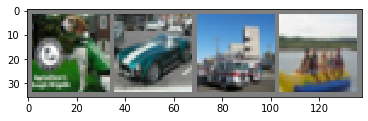

  dog   car truck  ship


In [38]:
# The function to show an image.
def imshow(img):
    img = img / 2 + 0.5     # Unnormalize.
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images.
dataiter = iter(trainloader)
images, labels = dataiter.next()
# Show images.
imshow(torchvision.utils.make_grid(images))
# Print labels.
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

#### Choose a Device

In [39]:
# If there are GPUs, choose the first one for computing. Otherwise use CPU.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)  
# If 'cuda:0' is printed, it means GPU is available.

cuda:0


#### Network Definition

In [43]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 10, (3,3), 1, 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(10, 20, (3,3), 1, 1)
        self.conv3 = nn.Conv2d(20, 30, (3,3), 1, 1)
        self.fc1 = nn.Linear(30 * 4 * 4, 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 10)     
        
    def forward(self, x):
        x = self.pool(torch.sigmoid(self.conv1(x)))
        x = self.pool(torch.sigmoid(self.conv2(x)))
        x = self.pool(torch.sigmoid(self.conv3(x)))
        x = x.view(-1, 30 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()     # Create the network instance.
net.to(device)  # Move the network parameters to the specified device.

Net(
  (conv1): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(20, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=480, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=10, bias=True)
)

#### Optimizer and Loss Function

In [44]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use stochastic gradient descent (SGD) as optimizer.
opt = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) 

#### Training Procedure

In [45]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 1000  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = net(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:   999] avg mini-batch loss: 2.477
[epoch: 0, i:  1999] avg mini-batch loss: 2.362
[epoch: 0, i:  2999] avg mini-batch loss: 2.351
[epoch: 0, i:  3999] avg mini-batch loss: 2.346
[epoch: 0, i:  4999] avg mini-batch loss: 2.336
[epoch: 0, i:  5999] avg mini-batch loss: 2.333
[epoch: 0, i:  6999] avg mini-batch loss: 2.334
[epoch: 0, i:  7999] avg mini-batch loss: 2.332
[epoch: 0, i:  8999] avg mini-batch loss: 2.326
[epoch: 0, i:  9999] avg mini-batch loss: 2.325
[epoch: 0, i: 10999] avg mini-batch loss: 2.324
[epoch: 0, i: 11999] avg mini-batch loss: 2.325
[epoch: 1, i:   999] avg mini-batch loss: 2.323
[epoch: 1, i:  1999] avg mini-batch loss: 2.322
[epoch: 1, i:  2999] avg mini-batch loss: 2.323
[epoch: 1, i:  3999] avg mini-batch loss: 2.319
[epoch: 1, i:  4999] avg mini-batch loss: 2.320
[epoch: 1, i:  5999] avg mini-batch loss: 2.321
[epoch: 1, i:  6999] avg mini-batch loss: 2.321
[epoch: 1, i:  7999] avg mini-batch loss: 2.318
[epoch: 1, i:  8999] avg mini-batch loss

#### Training Loss Curve

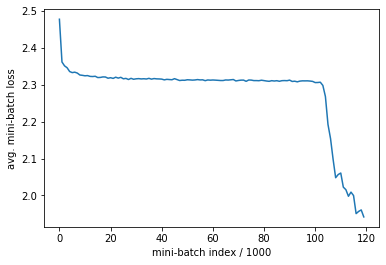

In [46]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

#### Evaluate on Test Dataset

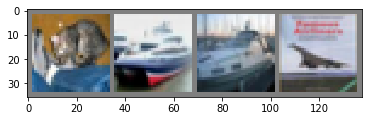

GroundTruth:    cat  ship  ship plane
Predicted:    cat   car  ship  ship


In [47]:
# Check several images.
dataiter = iter(testloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [48]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 28 %


In [49]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 34 %
Accuracy of   car : 33 %
Accuracy of  bird :  0 %
Accuracy of   cat : 34 %
Accuracy of  deer :  0 %
Accuracy of   dog :  2 %
Accuracy of  frog : 74 %
Accuracy of horse : 42 %
Accuracy of  ship : 30 %
Accuracy of truck : 33 %


# HeatMaps

In [13]:
classes = np.array(['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse',
       'ship', 'truck']).reshape(10,1)
classes.shape

(10, 1)

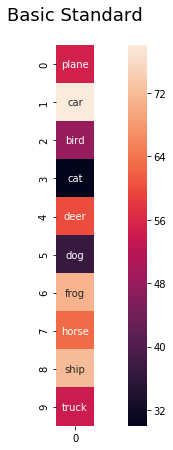

In [29]:
# Basic Standard
accs = np.array([55, 78, 48, 30, 60, 37, 71, 63, 72, 54]).reshape(10,1)
fig, ax = plt.subplots(figsize=(12,7))
title = 'Basic Standard'
plt.title(title, fontsize=18)
ttl = ax.title
ttl.set_position([0.5, 1.05])
sns.heatmap(accs, annot=classes, fmt="", square=True, ax=ax)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

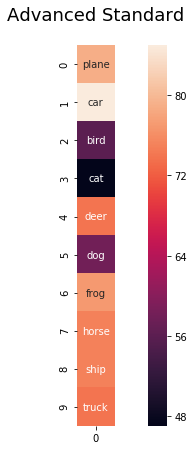

In [18]:
# Advanced Standard
accs = np.array([79, 85, 56, 47, 74, 58, 77, 75, 75, 74]).reshape(10,1)
fig, ax = plt.subplots(figsize=(12,7))
title = 'Advanced Standard'
plt.title(title, fontsize=18)
ttl = ax.title
ttl.set_position([0.5, 1.05])
sns.heatmap(accs, annot=classes, fmt="", square = True, ax=ax)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

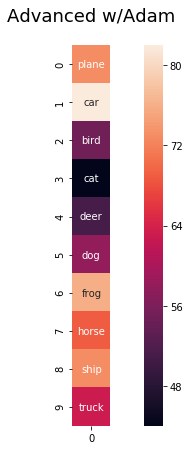

In [26]:
# Advanced Adam
accs = np.array([73, 82, 55, 44, 51, 58, 76, 69, 73, 63]).reshape(10,1)
fig, ax = plt.subplots(figsize=(12,7))
title = 'Advanced w/Adam'
plt.title(title, fontsize=18)
ttl = ax.title
ttl.set_position([0.5, 1.05])
sns.heatmap(accs, annot=classes, fmt="", square = True, ax=ax)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

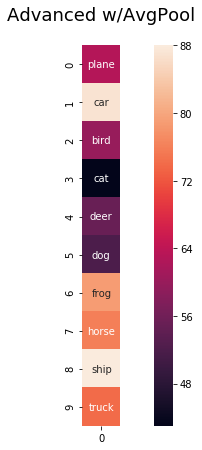

In [19]:
# Advanced Avgpool
accs = np.array([63, 87, 60, 43, 55, 52, 79, 76, 88, 74]).reshape(10,1)
fig, ax = plt.subplots(figsize=(12,7))
title = 'Advanced w/AvgPool'
plt.title(title, fontsize=18)
ttl = ax.title
ttl.set_position([0.5, 1.05])
sns.heatmap(accs, annot=classes, fmt="", square = True, ax=ax)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

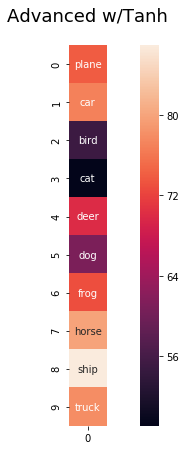

In [20]:
# Advanced Tanh
accs = np.array([74, 77, 55, 49, 70, 61, 73, 80, 87, 78]).reshape(10,1)
fig, ax = plt.subplots(figsize=(12,7))
title = 'Advanced w/Tanh'
plt.title(title, fontsize=18)
ttl = ax.title
ttl.set_position([0.5, 1.05])
sns.heatmap(accs, annot=classes, fmt="", square = True, ax=ax)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

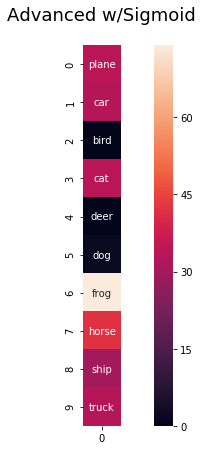

In [21]:
# Advanced Sigmoid
accs = np.array([34, 33, 0, 34, 0, 2, 74, 42, 30, 33]).reshape(10,1)
fig, ax = plt.subplots(figsize=(12,7))
title = 'Advanced w/Sigmoid'
plt.title(title, fontsize=18)
ttl = ax.title
ttl.set_position([0.5, 1.05])
sns.heatmap(accs, annot=classes, fmt="", square = True, ax=ax)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

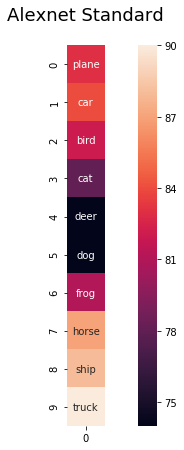

In [22]:
# Alexnet Standard
accs = np.array([83, 84, 82, 78, 74, 74, 81, 87, 88, 90]).reshape(10,1)
fig, ax = plt.subplots(figsize=(12,7))
title = 'Alexnet Standard'
plt.title(title, fontsize=18)
ttl = ax.title
ttl.set_position([0.5, 1.05])
sns.heatmap(accs, annot=classes, fmt="", square = True, ax=ax)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

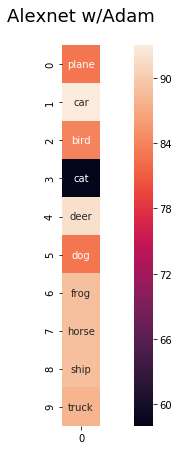

In [23]:
# Alexnet Adam 
accs = np.array([83, 93, 84, 58, 92, 83, 89, 89, 89, 88]).reshape(10,1)
fig, ax = plt.subplots(figsize=(12,7))
title = 'Alexnet w/Adam'
plt.title(title, fontsize=18)
ttl = ax.title
ttl.set_position([0.5, 1.05])
sns.heatmap(accs, annot=classes, fmt="", square = True, ax=ax)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

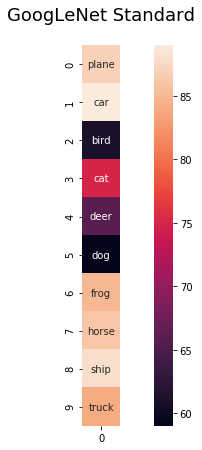

In [24]:
# Googlenet Standard
accs = np.array([87, 89, 61, 75, 66, 59, 85, 86, 88, 84]).reshape(10,1)
fig, ax = plt.subplots(figsize=(12,7))
title = 'GoogLeNet Standard'
plt.title(title, fontsize=18)
ttl = ax.title
ttl.set_position([0.5, 1.05])
sns.heatmap(accs, annot=classes, fmt="", square = True, ax=ax)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

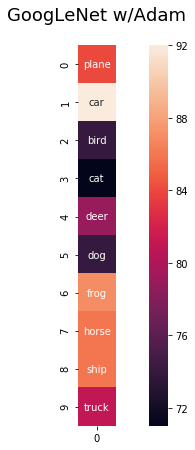

In [25]:
# Googlenet Adam
accs = np.array([84, 92, 74, 71, 79, 74, 87, 86, 86, 81]).reshape(10,1)
fig, ax = plt.subplots(figsize=(12,7))
title = 'GoogLeNet w/Adam'
plt.title(title, fontsize=18)
ttl = ax.title
ttl.set_position([0.5, 1.05])
sns.heatmap(accs, annot=classes, fmt="", square = True, ax=ax)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!